## Read in separate raw data files and create files of individual raster scans
### A. Ordog, June 2022
### NOTE: please do not modify
#### July 07, 2022: added in/out directories
#### July 12, 2022: added option of more than one raster scan for evening and morning

## Import packages and define survey day and file directory

In [1]:
import dva_sdhdf_combine_v3
import imp
import os
import subprocess
import h5py
import numpy as np
from astropy.time import Time
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import HourLocator as HourLocator
from matplotlib.dates import MinuteLocator as MinuteLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy import units as u
from astropy.time import TimeDelta
from astropy.modeling import models, fitting

day ='34'
Nm = 2 # number of morning raster scans
Ne = 2 # number of evening raster scans

#### Change the directory to where the files are located" ####
dir_in = '/home2/DATA_AO/DVA_DATA/survey_phase1_day'+day+'/'
dir_out = '/media/ordoga/DVA_data/survey_phase1_day'+day+'/'
##############################################################

## Read in the file listing raster scan start and stop times:

In [4]:
raster1_start = []
raster2_start = []
raster1_stop = []
raster2_stop = []
RA1 = []
RA2 = []
DEC1 = []
DEC2 = []

rast_list = ['a','b','c']

for i in range(0,Ne):
    
    if Ne == 1:
        rast1name = 'dva_survey_phase1_day0'+day+'_raster1.txt'
    else:
        rast1name = 'dva_survey_phase1_day0'+day+'_raster1'+rast_list[i]+'.txt'
        
    with open(dir_out+rast1name) as fp:
        for line in fp:  
            raster1_start.append(line.split()[3])
            raster1_stop.append(line.split()[4])
            RA1.append(float(line.split()[1])*360/24)
            DEC1.append(float(line.split()[2]))
            
for i in range(0,Nm):
    
    if Nm == 1:
        rast2name = 'dva_survey_phase1_day0'+day+'_raster2.txt'
    else:
        rast2name = 'dva_survey_phase1_day0'+day+'_raster2'+rast_list[i]+'.txt'
        
    with open(dir_out+rast2name) as fp:
        for line in fp:  
            raster2_start.append(line.split()[3])
            raster2_stop.append(line.split()[4])
            RA2.append(float(line.split()[1])*360/24)
            DEC2.append(float(line.split()[2]))

print('Evening raster starts:')
print(raster1_start)
print('Evening raster stops:')
print(raster1_stop)
print('')
print('Morning raster starts:')
print(raster2_start)
print('Morning raster stops:')
print(raster2_stop)

Evening raster starts:
['2022-07-13T01:28:07.835254', '2022-07-13T02:36:09.812798']
Evening raster stops:
['2022-07-13T02:32:22.549556', '2022-07-13T03:40:39.807776']

Morning raster starts:
['2022-07-13T12:15:25.254480', '2022-07-13T13:21:40.442580']
Morning raster stops:
['2022-07-13T13:19:33.552888', '2022-07-13T14:26:10.078831']


## Make files for each raster scan

### ***Note: skip this if files already made

In [5]:
%%time

imp.reload(dva_sdhdf_combine_v3)
fsamp = 2
rast_list = ['a','b','c']

for i in range(1,Ne):
    
    if Ne == 1:
        rast1name = 'dva_survey_phase1_day0'+day+'_raster1'
    else:
        rast1name = 'dva_survey_phase1_day0'+day+'_raster1'+rast_list[i]
        
    dva_sdhdf_combine_v3.combine(dir_in,dir_out,raster1_start[i],raster1_stop[i],
                                 rast1name,freq_s=fsamp,freq_avg=True)

for i in range(0,Nm):
    
    if Nm == 1:
        rast2name = 'dva_survey_phase1_day0'+day+'_raster2'
    else:
        rast2name = 'dva_survey_phase1_day0'+day+'_raster2'+rast_list[i]
        
    dva_sdhdf_combine_v3.combine(dir_in,dir_out,raster2_start[i],raster2_stop[i],
                                 rast2name,freq_s=fsamp,freq_avg=True)


Number of files:  134

------------------------------------------------------------------------
Number of frequency slices or bins (CAUTION: SHOULD BE WHOLE NUMBER):  1650.0
------------------------------------------------------------------------
8250
Timestamps per file:  50
1 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T02:35:15.000005Z.h5
2 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T02:35:45.000005Z.h5
3 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T02:36:15.000005Z.h5
4 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T02:36:45.000005Z.h5
5 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T02:37:15.000005Z.h5
6 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T02:37:45.000005Z.h5
7 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T02:38:15.000005Z.h5
8 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T02:38:45.000005Z.h5
9 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T02:39:15.000005Z.h5
10 /home2/DATA_AO/DVA_DATA/su

104 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T03:26:45.000005Z.h5
105 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T03:27:15.000005Z.h5
106 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T03:27:45.000005Z.h5
107 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T03:28:15.000005Z.h5
108 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T03:28:45.000005Z.h5
109 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T03:29:15.000005Z.h5
110 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T03:29:45.000005Z.h5
111 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T03:30:15.000005Z.h5
112 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T03:30:45.000005Z.h5
113 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T03:31:15.000005Z.h5
114 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T03:31:45.000005Z.h5
115 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T03:32:15.000005Z.h5
116 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022

35 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T12:31:15.000005Z.h5
36 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T12:31:45.000005Z.h5
37 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T12:32:15.000005Z.h5
38 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T12:32:45.000005Z.h5
39 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T12:33:15.000005Z.h5
40 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T12:33:45.000005Z.h5
41 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T12:34:15.000005Z.h5
42 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T12:34:45.000005Z.h5
43 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T12:35:15.000005Z.h5
44 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T12:35:45.000005Z.h5
45 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T12:36:15.000005Z.h5
46 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T12:36:45.000005Z.h5
47 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T12:37:

File  18  out of  134
File  19  out of  134
File  20  out of  134
File  21  out of  134
File  22  out of  134
File  23  out of  134
File  24  out of  134
File  25  out of  134
File  26  out of  134
File  27  out of  134
File  28  out of  134
File  29  out of  134
File  30  out of  134
File  31  out of  134
File  32  out of  134
File  33  out of  134
File  34  out of  134
File  35  out of  134
File  36  out of  134
File  37  out of  134
File  38  out of  134
File  39  out of  134
File  40  out of  134
File  41  out of  134
File  42  out of  134
File  43  out of  134
File  44  out of  134
File  45  out of  134
File  46  out of  134
File  47  out of  134
File  48  out of  134
File  49  out of  134
File  50  out of  134
File  51  out of  134
File  52  out of  134
File  53  out of  134
File  54  out of  134
File  55  out of  134
File  56  out of  134
File  57  out of  134
File  58  out of  134
File  59  out of  134
File  60  out of  134
File  61  out of  134
File  62  out of  134
File  63  

70 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T13:54:45.000005Z.h5
71 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T13:55:15.000005Z.h5
72 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T13:55:45.000005Z.h5
73 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T13:56:15.000005Z.h5
74 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T13:56:45.000005Z.h5
75 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T13:57:15.000005Z.h5
76 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T13:57:45.000005Z.h5
77 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T13:58:15.000005Z.h5
78 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T13:58:45.000005Z.h5
79 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T13:59:15.000005Z.h5
80 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T13:59:45.000005Z.h5
81 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T14:00:15.000005Z.h5
82 /home2/DATA_AO/DVA_DATA/survey_phase1_day34/2022-07-13T14:00:

File  133  out of  136
File  134  out of  136
File  135  out of  136
File  136  out of  136
CPU times: user 3min 9s, sys: 44.2 s, total: 3min 53s
Wall time: 14min 48s


## Read in raster scan files:

In [6]:
%%time

rast_list = ['a','b','c']

dec_rast1   = []; dec_rast2   = []
ra_rast1    = []; ra_rast2    = []
el_rast1    = []; el_rast2    = []
az_rast1    = []; az_rast2    = []
t_rast1     = []; t_rast2     = []
noise_rast1 = []; noise_rast2 = []
RR_rast1    = []; RR_rast2    = []
LL_rast1    = []; LL_rast2    = []
reRL_rast1  = []; reRL_rast2  = []
imRL_rast1  = []; imRL_rast2  = []

for i in range(0,Ne):
    
    print(i)
    
    if Ne == 1:
        rast1name = 'dva_survey_phase1_day0'+day+'_raster1.h5'
    else:
        rast1name = 'dva_survey_phase1_day0'+day+'_raster1'+rast_list[i]+'.h5'
        
    file = h5py.File(dir_out+rast1name,'r')
    dataset1 = file['data']['beam_0']['band_SB0']['scan_0'] 
    dec_rast1.append(dataset1['metadata']['declination'])
    ra_rast1.append(dataset1['metadata']['right_ascension'])
    el_rast1.append(dataset1['metadata']['elevation'])
    az_rast1.append(dataset1['metadata']['azimuth'])
    t_rast1.append(dataset1['metadata']['utc'])
    noise_rast1.append(dataset1['metadata']['noise_state'])  
    RR_rast1.append(dataset1['data'][:,0,:])
    LL_rast1.append(dataset1['data'][:,1,:])
    reRL_rast1.append(dataset1['data'][:,2,:])
    imRL_rast1.append(dataset1['data'][:,3,:])
        

for i in range(0,Nm):
    
    print(i)
    
    if Nm == 1:
        rast2name = 'dva_survey_phase1_day0'+day+'_raster2.h5'
    else:
        rast2name = 'dva_survey_phase1_day0'+day+'_raster2'+rast_list[i]+'.h5'
        
    file = h5py.File(dir_out+rast2name,'r')
    dataset2 = file['data']['beam_0']['band_SB0']['scan_0']
    dec_rast2.append(dataset2['metadata']['declination'])
    ra_rast2.append(dataset2['metadata']['right_ascension'])
    el_rast2.append(dataset2['metadata']['elevation'])
    az_rast2.append(dataset2['metadata']['azimuth'])
    t_rast2.append(dataset2['metadata']['utc'])
    noise_rast2.append(dataset2['metadata']['noise_state'])  
    RR_rast2.append(dataset2['data'][:,0,:])
    LL_rast2.append(dataset2['data'][:,1,:])
    reRL_rast2.append(dataset2['data'][:,2,:])
    imRL_rast2.append(dataset2['data'][:,3,:])
    
freq_rast = file['data']['beam_0']['band_SB0']['frequency'][:]/1e6


0
1
0
1
CPU times: user 4.6 s, sys: 23.4 s, total: 28 s
Wall time: 9min 2s


In [7]:
ra_rast1_deg = []
t_plt_rast1 = []

ra_rast2_deg = []
t_plt_rast2 = []

for i in range(0,Ne):
    
    ra_rast1_deg.append(ra_rast1[i]*360./24.)
    t_plt_rast1.append(Time(t_rast1[i], format='isot',scale='utc').mjd)
    
for i in range(0,Nm):
    
    ra_rast2_deg.append(ra_rast2[i]*360./24.)
    t_plt_rast2.append(Time(t_rast2[i], format='isot',scale='utc').mjd)

print(t_plt_rast1)
print(t_plt_rast2)

[array([59773.06059028, 59773.06059722, 59773.06060417, ...,
       59773.10709722, 59773.10710417, 59773.10711111]), array([59773.1078125 , 59773.10781944, 59773.10782639, ...,
       59773.15431944, 59773.15432639, 59773.15433333])]
[array([59773.50989583, 59773.50990278, 59773.50990972, ...,
       59773.55640278, 59773.55640972, 59773.55641667]), array([59773.55572917, 59773.55573611, 59773.55574306, ...,
       59773.60293056, 59773.6029375 , 59773.60294444])]


## Plot raster scans:

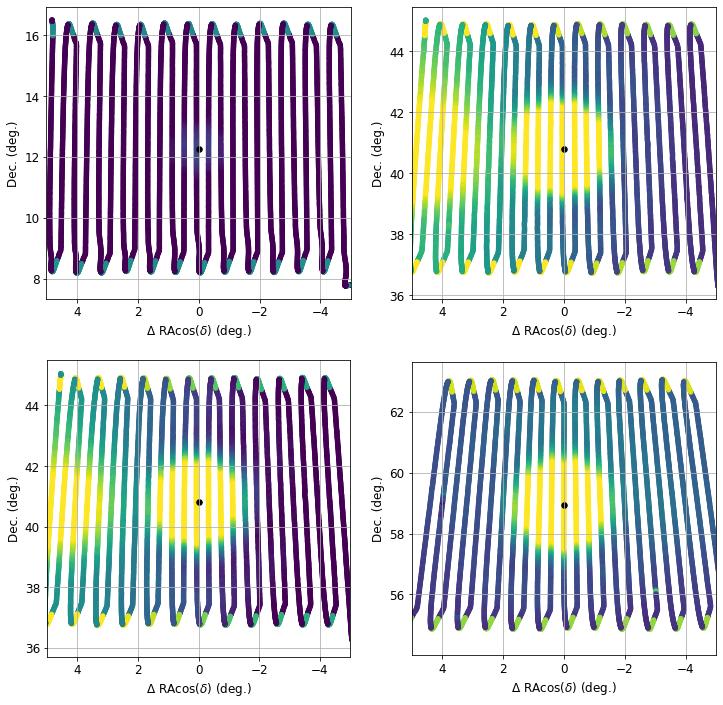

In [8]:
fs = 12
freq_plt = 650. # in MHz
df = freq_rast[1]-freq_rast[0]
wf = np.where(abs(freq_rast-freq_plt)<df)[0][0]

if (Ne > 1 or Nm > 1):
    fig1, axs = plt.subplots(2,2,figsize=(12,12))
    for i in range(0,2):
        
        t1_plt = Time(raster1_start[i], format='isot',scale='utc').mjd
        t2_plt = Time(raster1_stop[i], format='isot',scale='utc').mjd
        wplt1 = np.where((t_plt_rast1[i] >= t1_plt) & (t_plt_rast1[i] <= t2_plt))
        
        plot1 = axs[i,0].scatter( (ra_rast1_deg[i][wplt1]-RA1[i])*np.cos(dec_rast1[i][wplt1]*np.pi/180.), dec_rast1[i][wplt1],
                                s=20,c=10.*np.log10(LL_rast1[i][wplt1,wf]),cmap='viridis',vmin=72, vmax=74)
        axs[i,0].scatter(0,DEC1[i],s=30,color='black')
        
        
        t1_plt = Time(raster2_start[i], format='isot',scale='utc').mjd
        t2_plt = Time(raster2_stop[i], format='isot',scale='utc').mjd
        wplt2 = np.where((t_plt_rast2[i] >= t1_plt) & (t_plt_rast2[i] <= t2_plt))

        plot2 = axs[i,1].scatter( (ra_rast2_deg[i][wplt2]-RA2[i])*np.cos(dec_rast2[i][wplt2]*np.pi/180.), dec_rast2[i][wplt2],
                                s=20,c=10.*np.log10(LL_rast2[i][wplt2,wf]),cmap='viridis',vmin=72, vmax=74)
        axs[i,1].scatter(0,DEC2[i],s=30,color='black')
        
        for j in range(0,2):
            axs[i,j].set_xlabel('$\Delta$ RAcos($\delta$) (deg.)',fontsize=fs)
            axs[i,j].set_ylabel('Dec. (deg.)',fontsize=fs)
            axs[i,j].tick_params(axis="x", labelsize=fs)
            axs[i,j].tick_params(axis="y", labelsize=fs)
            axs[i,j].set_xlim(5,-5)
            axs[i,j].set(aspect='equal')
            axs[i,j].grid()
    
        
else:
    fig1, axs = plt.subplots(1,2,figsize=(12,6))    
    t1_plt = Time(raster1_start[0], format='isot',scale='utc').mjd
    t2_plt = Time(raster1_stop[0], format='isot',scale='utc').mjd
    wplt1 = np.where((t_plt_rast1[0] >= t1_plt) & (t_plt_rast1[0] <= t2_plt))
    t1_plt = Time(raster2_start[0], format='isot',scale='utc').mjd
    t2_plt = Time(raster2_stop[0], format='isot',scale='utc').mjd
    wplt2 = np.where((t_plt_rast2[0] >= t1_plt) & (t_plt_rast2[0] <= t2_plt))
    dB1 = 68
    dB2 = 74
    plot1 = axs[0].scatter( (ra_rast1_deg[0][wplt1]-RA1[0])*np.cos(dec_rast1[0][wplt1]*np.pi/180.), dec_rast1[0][wplt1],
                            s=20,c=10.*np.log10(LL_rast1[0][wplt1,wf]),cmap='viridis',vmin=73, vmax=79)
    axs[0].scatter(0,DEC1[0],s=30,color='black')

    plot2 = axs[1].scatter( (ra_rast2_deg[0][wplt2]-RA2[0])*np.cos(dec_rast2[0][wplt2]*np.pi/180.), dec_rast2[0][wplt2],
            s=20,c=10.*np.log10(LL_rast2[0][wplt2,wf]),cmap='viridis',vmin=72, vmax=77)
    axs[1].scatter(0,DEC2,s=30,color='black')

    for i in range(0,2):
        axs[i].set_xlabel('$\Delta$ RAcos($\delta$) (deg.)',fontsize=fs)
        axs[i].set_ylabel('Dec. (deg.)',fontsize=fs)
        axs[i].tick_params(axis="x", labelsize=fs)
        axs[i].tick_params(axis="y", labelsize=fs)
        axs[i].set_xlim(5,-5)
        axs[i].set(aspect='equal')
        axs[i].grid()
    


## Old code - Becky's work on Gaussian fits replaces this

In [ ]:
grid_x1, grid_y1 = np.mgrid[-5:5:1001j, DEC1-5:DEC1+5:1001j]
grid_z1 = griddata( ((ra_rast1_deg[wplt1]-RA1)*np.cos(dec_rast1[wplt1]*np.pi/180.), dec_rast1[wplt1]), 
                   LL_rast1[wplt1,wf][0], (grid_x1, grid_y1), method='linear')

grid_x2, grid_y2 = np.mgrid[-5:5:1001j, DEC2-5:DEC2+5:1001j]
grid_z2 = griddata( ((ra_rast2_deg[wplt2]-RA2)*np.cos(dec_rast2[wplt2]*np.pi/180.), dec_rast2[wplt2]), 
                   LL_rast2[wplt2,wf][0], (grid_x2, grid_y2), method='linear')

In [ ]:
# Formatting plot
fs = 12
fig1, axs = plt.subplots(1,2,figsize=(12,6))

# Just plotting LL total power for now - correcting for cos(dec):
plot1 = axs[0].imshow(grid_z1.T,vmin=1e6,vmax=2e7,zorder=0,extent=[-5,5,DEC1-5,DEC1+5],origin='lower')
axs[0].scatter(0,DEC1,s=30,color='black')

# Just plotting LL total power for now - correcting for cos(dec):
plot2 = axs[1].imshow(grid_z2.T,vmin=1e6,vmax=2e7,zorder=0,extent=[-5,5,DEC2-5,DEC2+5],origin='lower')
axs[1].scatter(0,DEC2,s=30,color='black')

for i in range(0,2):
    axs[i].set_xlabel('$\Delta$ RAcos($\delta$) (deg.)',fontsize=fs)
    axs[i].set_ylabel('Dec. (deg.)',fontsize=fs)
    axs[i].tick_params(axis="x", labelsize=fs)
    axs[i].tick_params(axis="y", labelsize=fs)
    axs[i].set_xlim(5,-5)
    axs[i].set(aspect='equal')
    axs[i].grid()
    #axs[i].set_title(str(src_name[source])+" Raster Scan, "+str(date))
    #fig.colorbar(plot, ax=axs)
axs[0].set_ylim(DEC1-5,DEC1+5)
axs[1].set_ylim(DEC2-5,DEC2+5)

In [ ]:
src_name = 'VIRA'
# provide an initial 'guess' at the model fit parameters
# Amplitude and the location of the y mean will differ for every source
if src_name == 'CYGA':
    amp = 5e8
    dec_mean = 41
if src_name == 'CASA':
    amp = 2.5e7
    dec_mean = 59
#**TAUA AND VIRA HAVE NOT BEEN OPTIMIZED
if src_name == 'TAUA':
    amp = 5e7
    dec_mean = 22
if src_name == 'VIRA':
    amp = 3e6
    dec_mean = 12.3
# (play around with how much you can vary these and still make the fit work)
# 2D Gaussian
g1 = models.Gaussian2D(amplitude=amp, x_mean=0., y_mean=dec_mean, x_stddev=1., y_stddev=1.) 
#g1 = models.Gaussian2D() 
# 2D constant offset value
g2 = models.Planar2D(slope_x = 0, slope_y = 0, intercept = 1e6) 
#g2 = models.Planar2D() 
    
# Add the two together
g_init = g2+g1
#print(g_init)

# The fitting algorithm (there may be other options):
fit_g = fitting.LevMarLSQFitter()

# The RA, DEC and LL data values to provide as x, y, z to the fitting algorithm:
x = (ra_rast2_deg[wplt2]-RA2)*np.cos(dec_rast2[wplt2]*np.pi/180.)
y = dec_rast2[wplt2]
z = LL_rast2[wplt2,wf]

print(x.shape)
print(y.shape)
print(z[0].shape)

# Do the fit:
# Inputs here are the initial guess, the x and y grid,
# and the z values of the Gaussian we set up:
fitfunc = fit_g(g_init, grid_x1, grid_y1, grid_z1)

#print(fitfunc)
print('Gaussian:')
print("Amplitude:", fitfunc[1].amplitude.value)
print("x mean:", fitfunc[1].x_mean.value)
print("y mean:", fitfunc[1].y_mean.value)
print("x standard deviation:", fitfunc[1].x_stddev.value)
print("y standard deviation:", fitfunc[1].y_stddev.value)
print("x fwhm:", fitfunc[1].x_fwhm)
print("y fwhm:", fitfunc[1].y_fwhm)
print('')
print('Offset:')
print("x slope:", fitfunc[0].slope_x.value)
print("y slope:", fitfunc[0].slope_y.value)
print("intercept:", fitfunc[0].intercept.value)